In [42]:
import numpy as np
import scipy.linalg as la
import matplotlib.pyplot as plt
from time import clock

In [43]:
def create_random_matrix(size=758):
    matrix = np.random.rand(size,size)
    matrix = np.round(matrix,5)
    vector = np.random.rand(size)
    vector = np.round(vector, 5)
    return matrix, vector

In [44]:
size = 5
matrix, vector = create_random_matrix(size)

In [45]:
matrix

array([[ 0.90668,  0.0833 ,  0.29939,  0.92475,  0.39161],
       [ 0.9838 ,  0.47463,  0.6089 ,  0.1992 ,  0.87169],
       [ 0.90232,  0.69567,  0.47581,  0.42842,  0.94284],
       [ 0.12882,  0.90645,  0.00131,  0.33111,  0.9041 ],
       [ 0.57614,  0.55609,  0.65791,  0.34345,  0.65185]])

In [46]:
vector

array([ 0.8704 ,  0.91061,  0.08523,  0.91304,  0.97733])

In [118]:
start = clock()
x = np.linalg.solve(matrix, vector)
end = clock()



In [119]:
print("Time of solving for 5x5 matix is: {0}s ".format(end - start))

Time of solving for 5x5 matix is: 0.033780675669277116s 


In [66]:
x

(10,
 110,
 210,
 310,
 410,
 510,
 610,
 710,
 810,
 910,
 1010,
 1110,
 1210,
 1310,
 1410,
 1510,
 1610,
 1710,
 1810,
 1910,
 2010,
 2110,
 2210,
 2310,
 2410,
 2510,
 2610,
 2710,
 2810,
 2910,
 3010,
 3110,
 3210,
 3310,
 3410,
 3510,
 3610,
 3710,
 3810,
 3910,
 4010,
 4110,
 4210,
 4310,
 4410,
 4510,
 4610,
 4710,
 4810,
 4910)

In [112]:
start = clock()
P, L, U = la.lu(matrix)
end = clock()


In [117]:
print("Time of LU decomposition for 5x5 matix is: {0}s ".format(end - start))

Time of LU decomposition for 5x5 matix is: 0.061897181864424056s 


In [70]:
P

array([[ 0.,  0.,  0., ...,  0.,  0.,  0.],
       [ 0.,  0.,  0., ...,  0.,  0.,  0.],
       [ 0.,  0.,  0., ...,  0.,  0.,  0.],
       ..., 
       [ 0.,  0.,  0., ...,  0.,  0.,  0.],
       [ 0.,  0.,  0., ...,  0.,  0.,  0.],
       [ 0.,  0.,  0., ...,  0.,  0.,  0.]])

In [50]:
result = matrix @ x
result = np.round(result,5)

In [51]:
np.array_equal(result, vector)

True

In [99]:
decomposition_times = {}

In [100]:
for i in range(0,11):
    matrix, vector = create_random_matrix(10+i*99)
    start = clock()
    P, L, U = la.lu(matrix)
    end = clock()
    times=end - start
    decomposition_times.update({10+i*99: times})
    

In [101]:
decomposition_times

{10: 0.0050329511809650285,
 109: 0.0005038549570599571,
 208: 0.0014868386551825097,
 307: 0.00357737019430715,
 406: 0.008141456346038467,
 505: 0.009796713186005945,
 604: 0.013220127699241857,
 703: 0.023545888590433606,
 802: 0.027271616077086946,
 901: 0.03766315803204634,
 1000: 0.05691741537339112}

In [102]:
lists = sorted(decomposition_times.items())
x, y = zip(*lists)

In [103]:
coef = np.polyfit(x,y,2)

In [104]:
coef

array([  8.04515904e-08,  -3.25481565e-05,   5.04890002e-03])

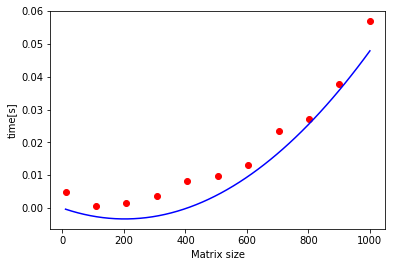

In [105]:
plt.plot(x, y, 'ro')
t = np.linspace(10,1000)
plt.plot(t, coef[0]*t**2+coef[1]*t,'b')
plt.xlabel('Matrix size')
plt.ylabel('time[s]')
plt.show()

In [106]:
solving_times = {}

In [107]:
for i in range(0,11):
    matrix, vector = create_random_matrix(10+i*99)
    start = clock()
    x = np.linalg.solve(matrix,vector)
    end = clock()
    times=end - start
    solving_times.update({10+i*99: times})
    

In [108]:
solving_times

{10: 9.423953815712593e-05,
 109: 0.0004357412312856468,
 208: 0.0009232675556631875,
 307: 0.002146048890608654,
 406: 0.0038367621905308624,
 505: 0.006772650379843981,
 604: 0.00661636203631133,
 703: 0.009966997500214347,
 802: 0.01741378715087194,
 901: 0.03149093480942611,
 1000: 0.026262506566581578}

In [121]:
lists = sorted(solving_times.items())
x, y = zip(*lists)

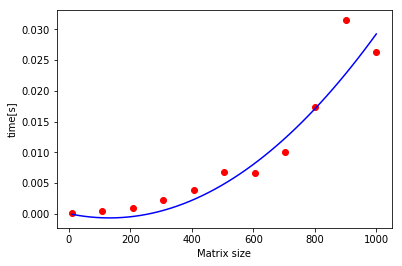

In [122]:
coef = np.polyfit(x,y,2)
plt.plot(x, y, 'ro')
t = np.linspace(10,1000)
plt.plot(t, coef[0]*t**2+coef[1]*t,'b')
plt.xlabel('Matrix size')
plt.ylabel('time[s]')
plt.show()